In [1]:
from typing_extensions import TypedDict, NotRequired, Required
from pydantic import BaseModel, ConfigDict
from typing import Annotated, Optional, Union
from operator import add
from Web_Page_Class_and_Tests.Web_Page import WebPage
from dataclasses import dataclass

# class CustomBaseModel(BaseModel): # A custom Base Model class is needed to allow 'web_page_object: WebPage' to validate an arbitrary type 'WebPage'
#     model_config = ConfigDict(arbitrary_types_allowed=True)

class Web_Page_Transformer_State(TypedDict): 
    # model_config = ConfigDict(arbitrary_types_allowed = True)
    url: str
    llm_model: str 
    download: bool
    web_page_object: WebPage
    html_original: str 
    html_original_text: str
    improvement_instructions: Annotated[list[str], add] 
    html_edited_dir: str
    html_edited_final_dir: str 
    finished_improvements: bool 

In [2]:
def web_page_creation_node(state: Web_Page_Transformer_State): 
    print("Downloading Web Page...")
    print(state["download"])
    print(state["llm_model"])
    web_page = WebPage(url = state["url"], download = state["download"], llm_model = state["llm_model"])
    return {"web_page_object": web_page}

In [3]:
def web_page_html_original_node(state: Web_Page_Transformer_State): 
    html_original = state["web_page_object"].html_var() 
    html_original_text = state["web_page_object"].html_text 
    return {"html_original": html_original, "html_original_text": html_original_text}

In [4]:
def llm_edit_web_page_node(state: Web_Page_Transformer_State): 
    html_edited_dir = state["web_page_object"].llm_edit_page() 
    return {"html_edited_dir": html_edited_dir}

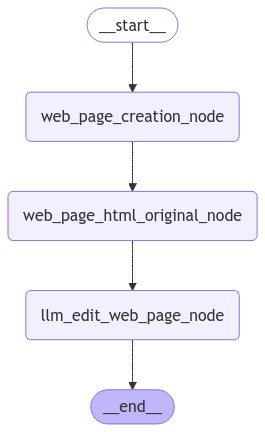

In [5]:
from IPython.display import Image, display
from langgraph.prebuilt import ToolNode, tools_condition 
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START, END

builder = StateGraph(Web_Page_Transformer_State) 

builder.add_node("web_page_creation_node", web_page_creation_node) 
builder.add_node("web_page_html_original_node", web_page_html_original_node) 
builder.add_node("llm_edit_web_page_node", llm_edit_web_page_node)  

builder.add_edge(START, "web_page_creation_node") 
builder.add_edge("web_page_creation_node", "web_page_html_original_node") 
builder.add_edge("web_page_html_original_node", "llm_edit_web_page_node") 
builder.add_edge("llm_edit_web_page_node", END)

graph = builder.compile() 

display(Image(graph.get_graph(xray = True).draw_mermaid_png()))

In [10]:
config = {"configurable": {"thread_id": "example_web_graph"}} 

example_url = "https://www.github.com" 

output = graph.invoke({"url": example_url, "download": True, "llm_model": "llama3.1:70b"}, config = config)

True
llama3.1:70b


In [11]:
print(output)

{'url': 'https://www.github.com', 'llm_model': 'llama3.1:70b', 'download': True, 'web_page_object': <Web_Page_Class_and_Tests.Web_Page.WebPage object at 0x7f3c47f6fa10>, 'html_original': '\n\n\n\n\n\n\n<!DOCTYPE html>\n<html\n  lang="en"\n  data-color-mode="dark" data-dark-theme="dark"\n  data-color-mode="light" data-light-theme="light" data-dark-theme="dark"\n  data-a11y-animated-images="system" data-a11y-link-underlines="true"\n  \n  >\n\n\n\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n  \n    <link rel="preload" href="https://github.githubassets.com/

In [12]:
print(output["html_edited_dir"])

./Web_Page_Class_and_Tests/wget_web_page/www.github.com/index_edited.html


In [13]:
import webbrowser 

webbrowser.open(output["html_edited_dir"])

True

In [15]:
import os

print(os.getcwd())

/home/mpariaszevski/web_page_transformer/Web_Page_Transformer/Graph_Dir
